In [1]:
import os
import sys
import numpy as np

(x) : 1.7m
(y) : 0.5m
(z) : 0.8m


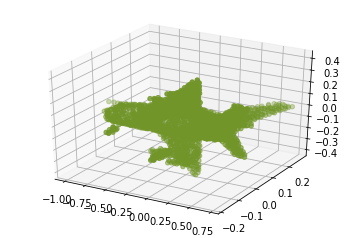

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from random import randint
import struct
import ctypes

def random_color_gen():
    """ Generates a random color

        Args: None

        Returns: 
            list: 3 elements, R, G, and B
    """
    r = randint(0, 255)
    g = randint(0, 255)
    b = randint(0, 255)
    return [r, g, b]


# Create a figure with a subplot with three axes

def visualization3D_xyz(new_cloud_data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # split the rgb column into three columns: red, green and blue
    rgb_columns = np.asarray(random_color_gen())

    # normalize the rgb values (they should be between [0, 1])
    rgb_columns = (rgb_columns / 255.0).astype(np.float)

    ax.scatter(new_cloud_data[:,0], new_cloud_data[:,1], new_cloud_data[:,2], color=rgb_columns);
    print("(x) : {:2.1f}m".format(new_cloud_data[:,0:1].max() - new_cloud_data[:,0:1].min()))
    print("(y) : {:2.1f}m".format(new_cloud_data[:,1:2].max() - new_cloud_data[:,1:2].min()))
    print("(z) : {:2.1f}m".format(new_cloud_data[:,2:3].max() - new_cloud_data[:,2:3].min()))

%matplotlib inline

data = np.load('./airplane_tmp.npy',allow_pickle=True, encoding = 'latin1')

visualization3D_xyz(data)

In [15]:
data.shape

(2048, 3)

In [17]:
data = np.expand_dims(data, axis=0)
data.shape

(1, 2048, 3)

(x) : 1.7m
(y) : 0.5m
(z) : 0.8m


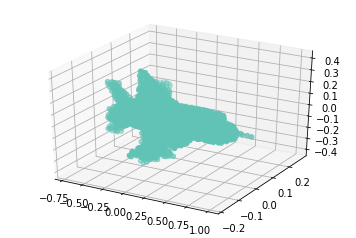

In [19]:
def rotate_point_cloud(batch_data):
    """ Randomly rotate the point clouds to augument the dataset
        rotation is per shape based along up direction
        Input:
          BxNx3 array, original batch of point clouds
        Return:
          BxNx3 array, rotated batch of point clouds
    """
    rotated_data = np.zeros(batch_data.shape, dtype=np.float32)
    for k in range(batch_data.shape[0]):
        rotation_angle = np.random.uniform() * 2 * np.pi
        cosval = np.cos(rotation_angle)
        sinval = np.sin(rotation_angle)
        rotation_matrix = np.array([[cosval, 0, sinval],
                                    [0, 1, 0],
                                    [-sinval, 0, cosval]])
        shape_pc = batch_data[k, ...]
        rotated_data[k, ...] = np.dot(shape_pc.reshape((-1, 3)), rotation_matrix)
    return rotated_data

rotate_point_cloud_data = rotate_point_cloud(data)
visualization3D_xyz(rotate_point_cloud_data[0])

(x) : 1.7m
(y) : 0.5m
(z) : 0.8m


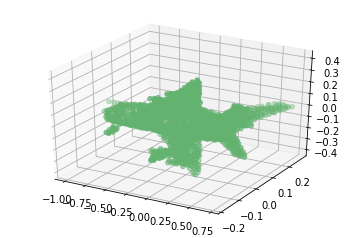

In [25]:
def rotate_point_cloud_by_angle(batch_data, rotation_angle):
    """ Rotate the point cloud along up direction with certain angle.
        Input:
          BxNx3 array, original batch of point clouds
        Return:
          BxNx3 array, rotated batch of point clouds
    """
    rotated_data = np.zeros(batch_data.shape, dtype=np.float32)
    for k in range(batch_data.shape[0]):
        #rotation_angle = np.random.uniform() * 2 * np.pi
        cosval = np.cos(rotation_angle)
        sinval = np.sin(rotation_angle)
        rotation_matrix = np.array([[cosval, 0, sinval],
                                    [0, 1, 0],
                                    [-sinval, 0, cosval]])
        shape_pc = batch_data[k, ...]
        rotated_data[k, ...] = np.dot(shape_pc.reshape((-1, 3)), rotation_matrix)
    return rotated_data

rotate_point_cloud_by_angle_data = rotate_point_cloud_by_angle(data, 0)
visualization3D_xyz(rotate_point_cloud_by_angle_data[0])

(x) : 0.9m
(y) : 0.5m
(z) : 1.6m


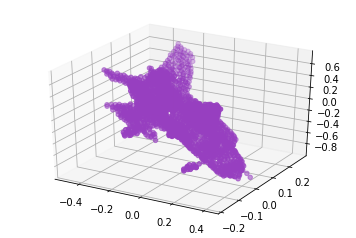

In [26]:
rotate_point_cloud_by_angle_data = rotate_point_cloud_by_angle(data, 90)
visualization3D_xyz(rotate_point_cloud_by_angle_data[0])

('Number of Point(data) :', 2048)
(x) : 1.7m
(y) : 0.5m
(z) : 0.8m
('Number of Point(jitter_point_cloud_data) :', 2048)


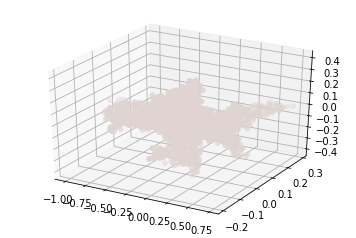

In [23]:
def jitter_point_cloud(batch_data, sigma=0.01, clip=0.05):
    """ Randomly jitter points. jittering is per point.
        Input:
          BxNx3 array, original batch of point clouds
        Return:
          BxNx3 array, jittered batch of point clouds
    """
    B, N, C = batch_data.shape
    assert(clip > 0)
    jittered_data = np.clip(sigma * np.random.randn(B, N, C), -1*clip, clip)
    jittered_data += batch_data
    return jittered_data

print("Number of Point(data) :", data.shape[1])
jitter_point_cloud_data = jitter_point_cloud(data)
visualization3D_xyz(jitter_point_cloud_data[0])
print("Number of Point(jitter_point_cloud_data) :", jitter_point_cloud_data.shape[1])